<font size="5">Titanic Classification Challenge: Ensemble Solution</font>

<u>Background<u />
    
The Titanic Competition is a popular machine learning challenge hosted by the data science platform/community Kaggle.\
Entrants are tasked with building a model that accuractely predicts (to the highest degree possible) whether passengers survived the ship's sinking or not, trained using a subset of the real passenger data.

Here, a RandomForest Classifier Ensemble from the Scikit-learn library is tuned and deployed as a solution;\
predictive performance is scored, and features are evaluated.

<br />

<u>Solution Development Process<u />
  1. Target and features are selected and restructured for use from available variables
  2. GridSearch Cross-Validation is performed for model evaluation and hyperparameter tuning
      * Detailed scoring results for possible hyperparameter configurations are displayed
  3. Optimal hyperparameter values are accessed and displayed
      * Accuracy of optimal model is scored using both the validation test set and out-of-bag samples
  4. Importance of training features is visualized, as measured by Gini Importance / Mean Decrease in Impurity (MDI)
    
\
Dataset: https://storage.googleapis.com/kaggle-forum-message-attachments/66979/2180/titanic.csv

In [1]:
#Import data handling packages
import numpy as np
import pandas as pd

#Read + preview data
full_data = pd.read_csv(r'C:\Users\Domanic\Desktop\titanic_full.csv')
full_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [2]:
#Import remaining necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

#Create feature + target dataframes; impute missing values using median due to skew in 'age' distribution)
#Split into 80% for training, 20% for testing
#Random states specified for reproducibility of results
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = pd.get_dummies(full_data.drop(full_data.columns[[1,2,4,7,8,9,10]], axis=1))
X['age'] = imputer.fit_transform(pd.DataFrame(full_data['age']))
y = full_data["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [3]:
#Specify estimator, hyperparameters/values for tuning + create 5-fold cross validation object
cv_rf = RandomForestClassifier(oob_score=True, random_state=1)

params_rf = {
             'n_estimators': [100, 200, 300, 400, 500],
             'max_depth': [3, 4, 5, 6, 7, None],
             'max_features': ['sqrt', 0.6, 0.8, 0.9, 1.0]
            }

grid_rf = GridSearchCV(estimator=cv_rf,
                       param_grid=params_rf,
                       cv=5,
                       verbose=0,
                       n_jobs=-1)

In [4]:
#Train + score cross-validation models 
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, None],
                         'max_features': ['sqrt', 0.6, 0.8, 0.9, 1.0],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [5]:
#Preview detailed cross-validation results
cv_results_df = pd.concat([pd.DataFrame(grid_rf.cv_results_).head(3), pd.DataFrame(grid_rf.cv_results_).tail(2)])
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.378059,0.046296,0.023951,0.001704,3,sqrt,100,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.800000,0.785714,0.765550,0.813397,0.775120,0.787956,0.017112,97
1,0.682788,0.036995,0.044296,0.003410,3,sqrt,200,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.800000,0.785714,0.775120,0.813397,0.770335,0.788913,0.015925,88
2,1.095186,0.076901,0.063971,0.003358,3,sqrt,300,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.823810,0.785714,0.770335,0.813397,0.770335,0.792718,0.022115,61
148,2.227560,0.134218,0.080750,0.008940,None,1.0,400,"{'max_depth': None, 'max_features': 1.0, 'n_es...",0.719048,0.752381,0.760766,0.765550,0.732057,0.745960,0.017674,150
149,2.248183,0.150512,0.067249,0.009485,None,1.0,500,"{'max_depth': None, 'max_features': 1.0, 'n_es...",0.733333,0.752381,0.760766,0.775120,0.736842,0.751688,0.015422,144


In [6]:
#Report best-scoring hyperparameter values
optimal_model = grid_rf.best_estimator_
print('Optimal number of estimators: {a}\nOptimal features sampled per node: {b}%\nOptimal max tree depth: {c}'.format(a=optimal_model.n_estimators, b=optimal_model.max_features*100, c=optimal_model.max_depth))

Optimal number of estimators: 400
Optimal features sampled per node: 90.0%
Optimal max tree depth: 4


In [7]:
#Compare validation set vs. out-of-bag accuracy scores for optimal model
print('Validation set accuracy: {:.2f}%'.format(optimal_model.score(X_test, y_test)*100))
print('Out-of-bag score: {:.2f}%'.format(optimal_model.oob_score_*100))

Validation set accuracy: 85.11%
Out-of-bag score: 79.75%


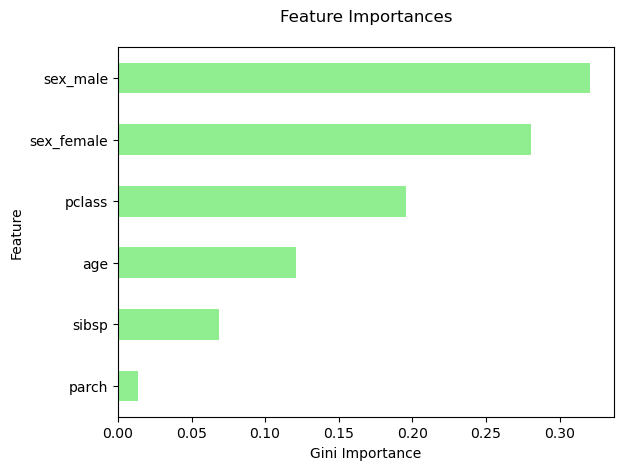

In [8]:
#Visualize feature importances as horizontal barplot
importances_sorted = pd.Series(
                               data=optimal_model.feature_importances_,
                               index=X_train.columns).sort_values()

importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Feature Importances\n')
plt.ylabel('Feature')
plt.xlabel('Gini Importance')
plt.show()